# **Predicting Heart Disease**
## **Project Overview**
The project focuses on predicting heart disease using the UCI Heart Disease dataset. Heart disease remains one of the leading causes of death worldwide, and early prediction and diagnosis can significantly enhance treatment outcomes. This project aims to build a machine learning model that can accurately predict the presence of heart disease based on various clinical and demographic features. By utilizing advanced data preprocessing techniques and various machine learning algorithms, the goal is to create a model that can aid healthcare professionals in identifying patients at risk of heart disease.

## **Dataset Description**
The UCI Heart Disease dataset is a well-known dataset that contains several features related to the diagnosis of heart disease. The dataset includes both categorical and numerical features, which are vital for building predictive models. Here's a detailed description of the features:

## **Feature Descriptions:**
**age:** Age of the patient (integer).

**sex:** Gender of the patient (categorical; 0 = female, 1 = male).

**cp:** Chest pain type (categorical; 0-3 values representing different types of chest pain).

**trestbps:** Resting blood pressure in mm Hg on admission to the hospital (integer).

**chol:** Serum cholesterol in mg/dl (integer).

**fbs:** Fasting blood sugar > 120 mg/dl (categorical; 1 = true, 0 = false).

**restecg:** Resting electrocardiographic results (categorical; 0-2 values representing different results).

**thalach:** Maximum heart rate achieved (integer).

**exang:** Exercise-induced angina (categorical; 1 = yes, 0 = no).

**oldpeak:** ST depression induced by exercise relative to rest (integer).

**slope:** Slope of the peak exercise ST segment (categorical; 0-2 values representing different slopes).

**ca:** Number of major vessels (0-3) colored by fluoroscopy (integer).

**thal:** Thalassemia (categorical; 3 = normal, 6 = fixed defect, 7 = reversible defect).

**num:**Target variable representing the presence of heart disease (integer; 0 = no disease, 1-4 = different levels of disease).

In [3]:
pip install ucimlrepo

## **Import Relevant Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Problem is Classification so use classifiaction algorithm for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## **Load Dataset**

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [6]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [7]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [8]:
## Data Cleaning And Preprocessing

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [11]:
X.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


## **Data Cleaning and Preprocessing**

In [12]:
X['ca'].fillna(X['ca'].mean(),inplace=True)
X['thal'].fillna(X['thal'].mode()[0],inplace=True)

<ipython-input-12-ceb7add5bd5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ca'].fillna(X['ca'].mean(),inplace=True)
<ipython-input-12-ceb7add5bd5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['thal'].fillna(X['thal'].mode()[0],inplace=True)


In [13]:
X.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [14]:
## Visulization of Data

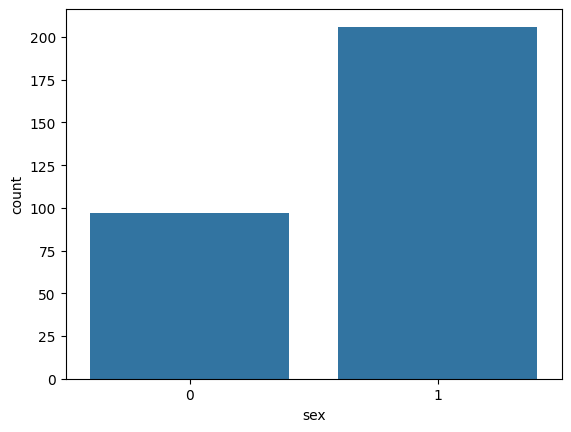

In [15]:
sns.countplot(x=X['sex'])
plt.show()


In [16]:

X['age'].max()

77

In [17]:
X['age'].min()

29

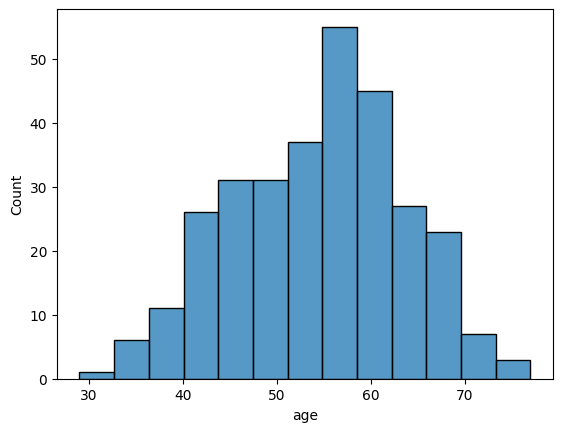

In [18]:
sns.histplot(x=X['age'])
plt.show()

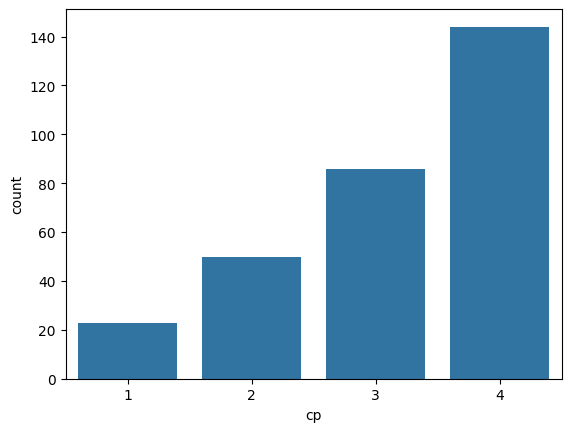

In [19]:



sns.countplot(x=X['cp'])
plt.show()


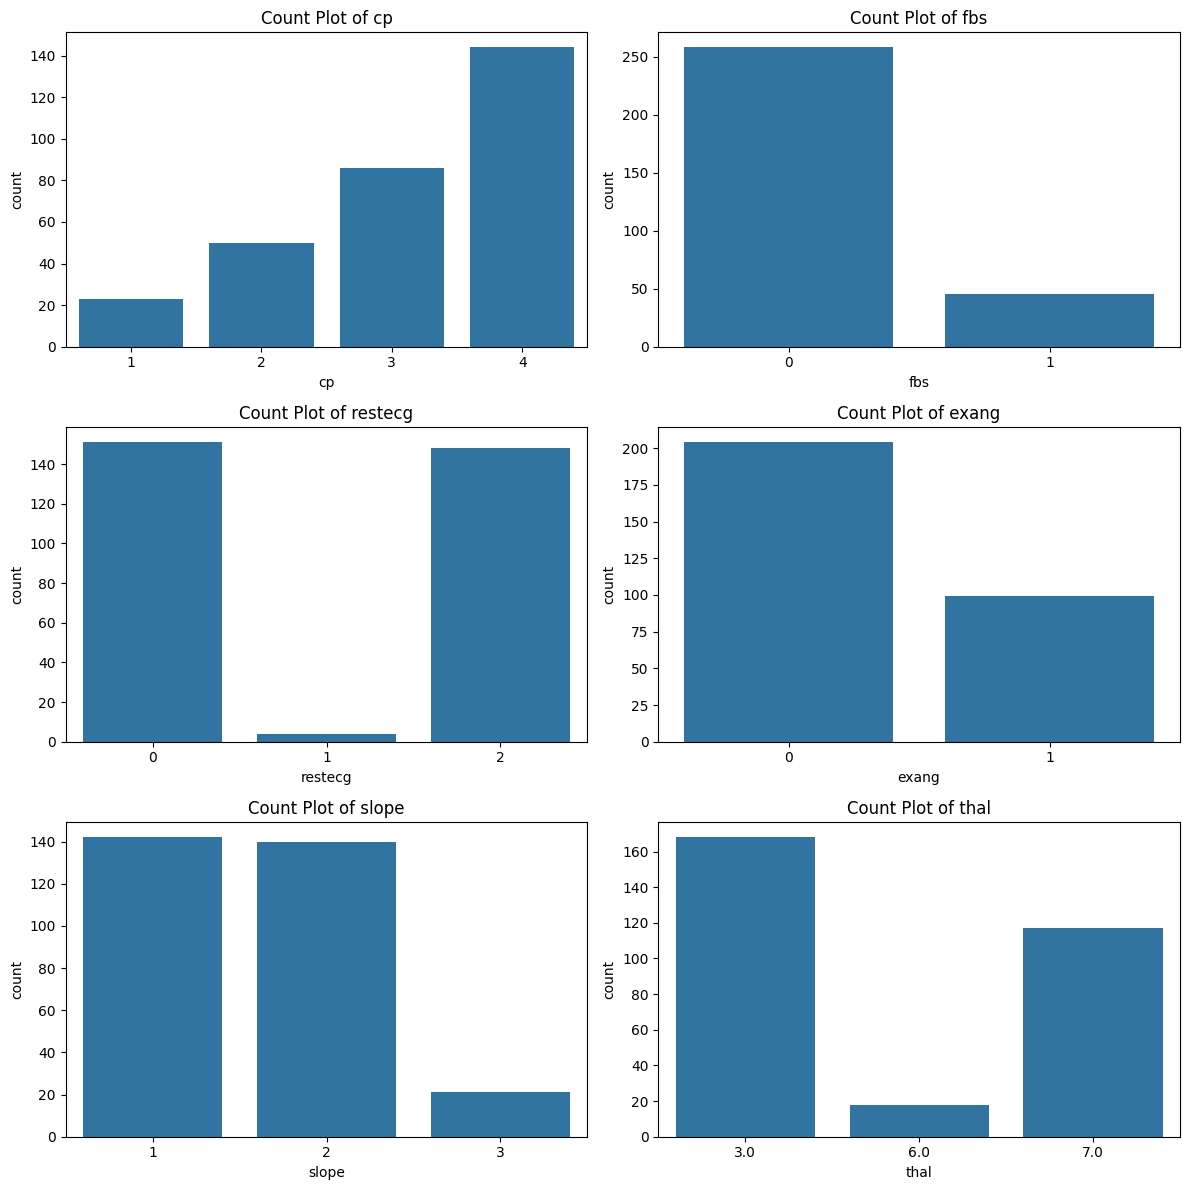

In [20]:
cols = ['cp','fbs','restecg', 'exang','slope','thal']

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

ax = ax.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=X[col], ax=ax[i])
    ax[i].set_title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()


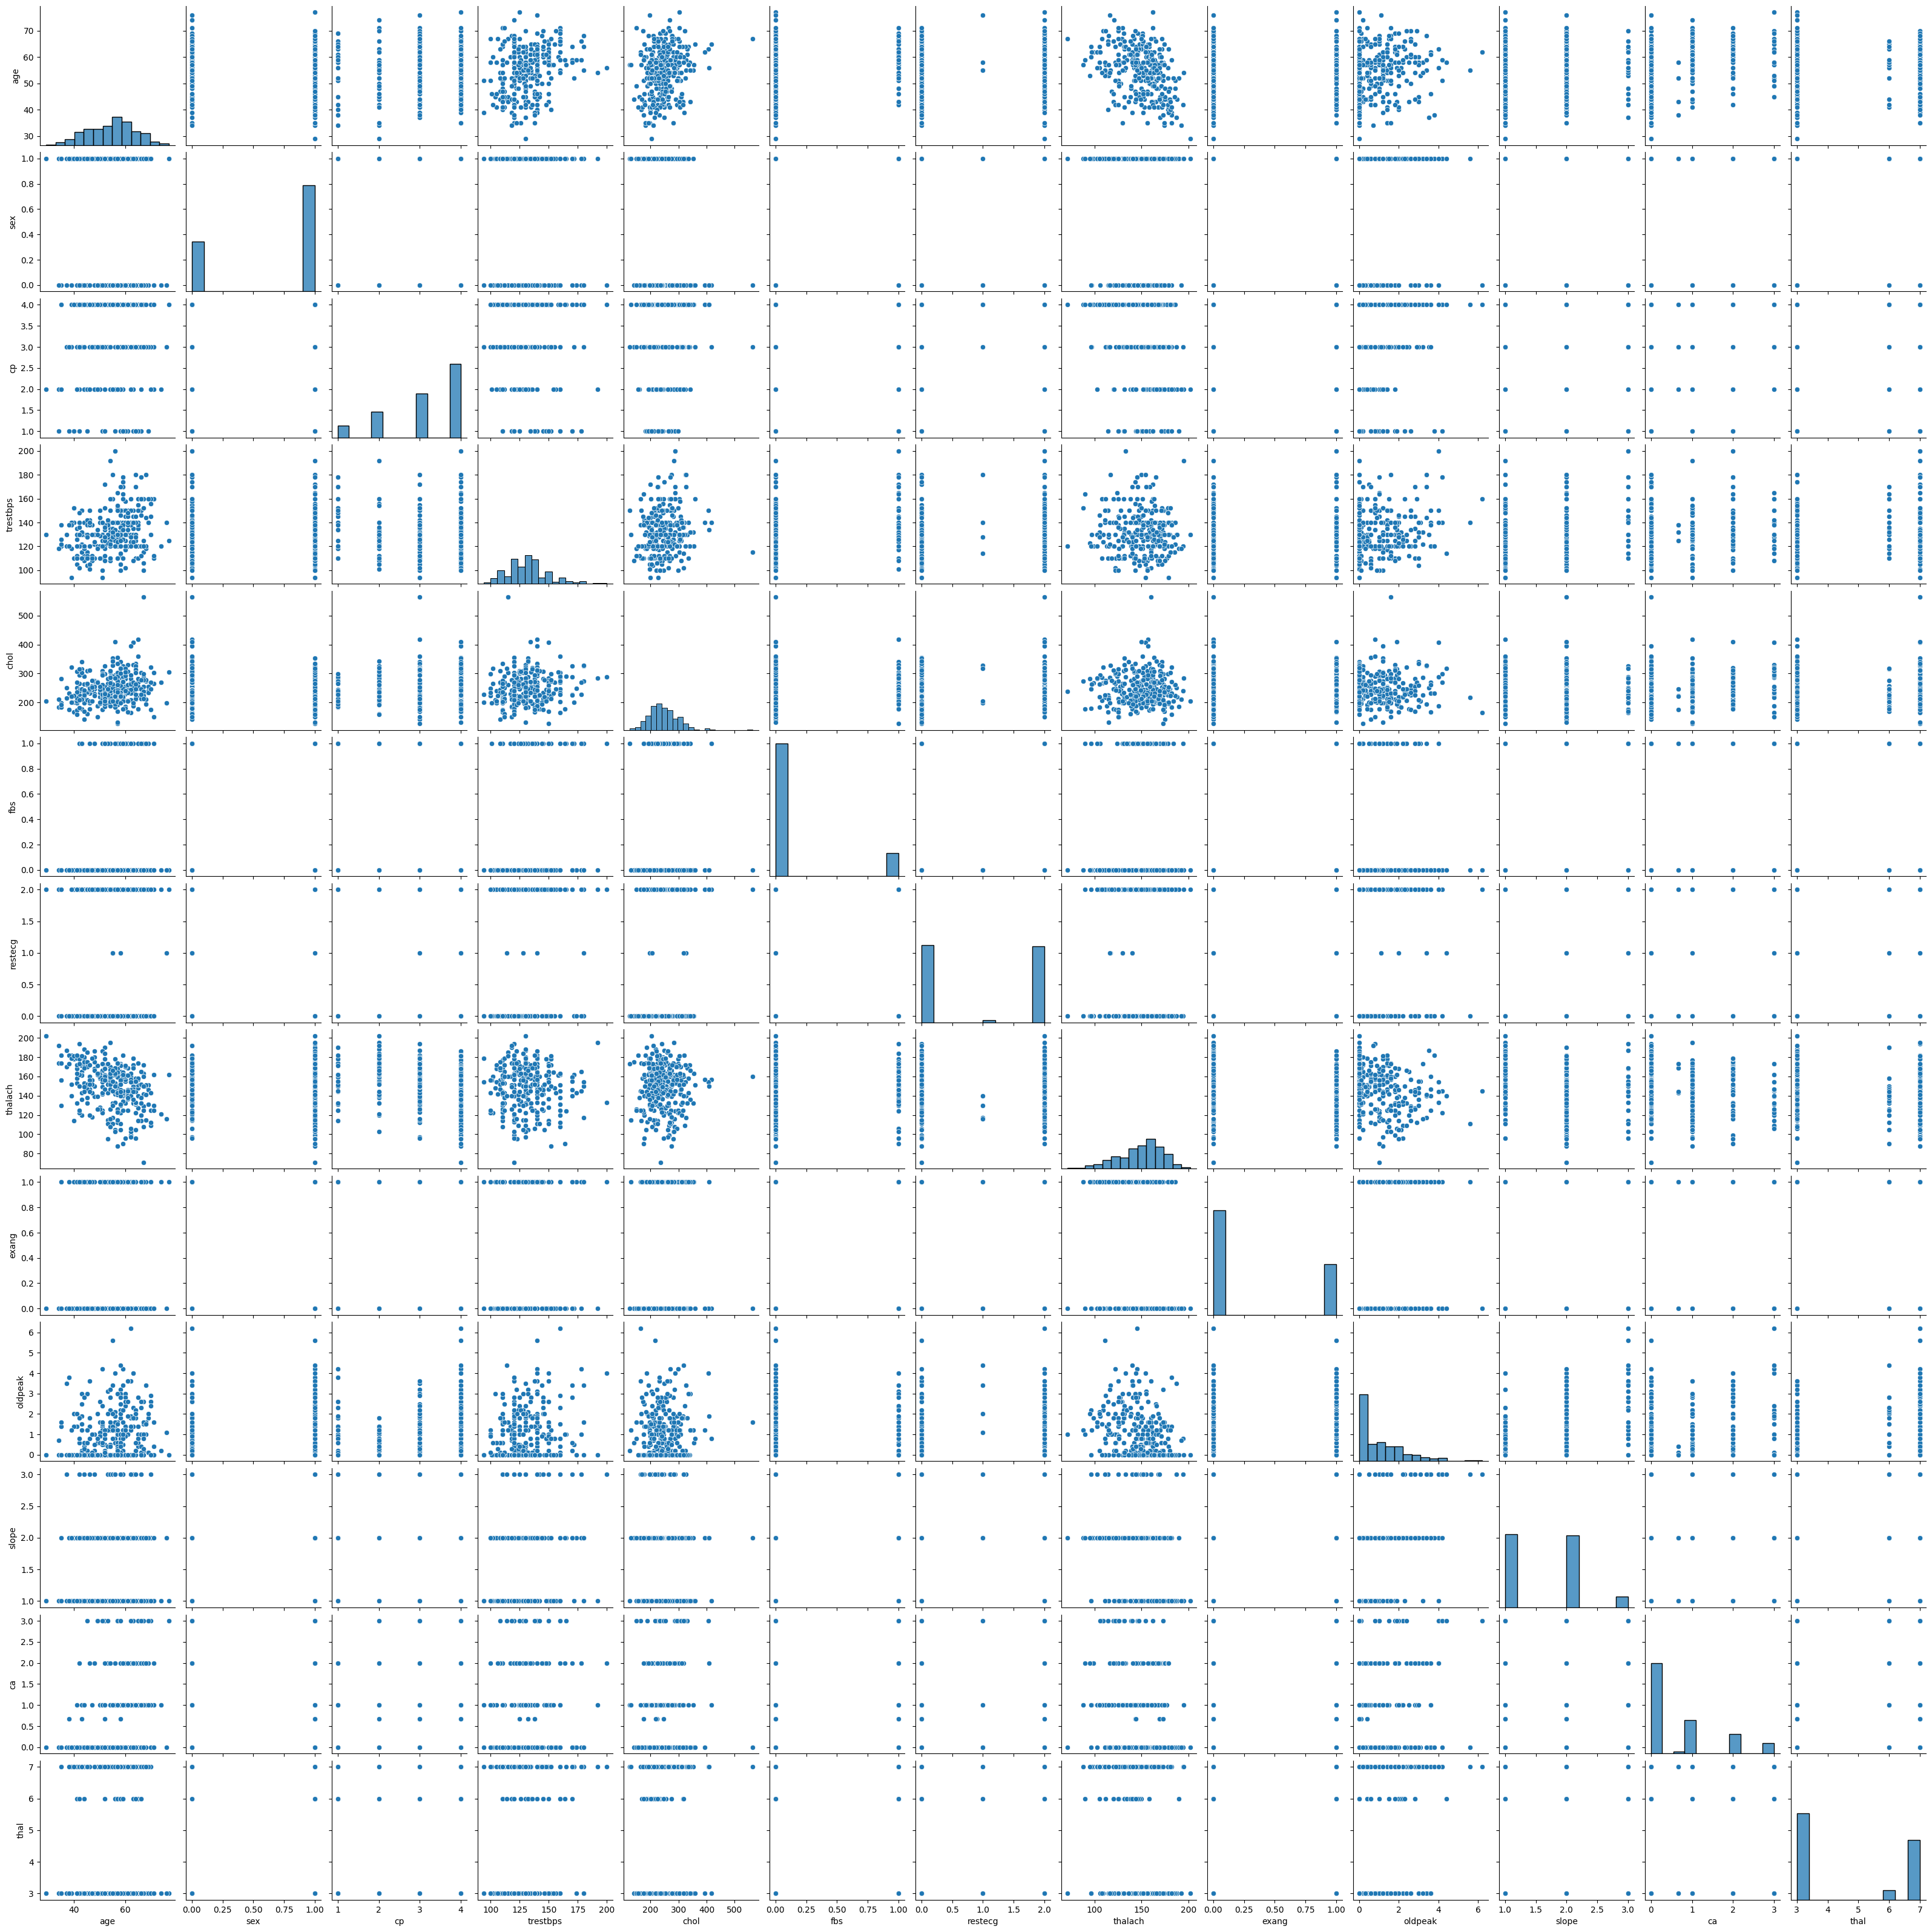

In [21]:
sns.pairplot(X)
plt.show()

In [22]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

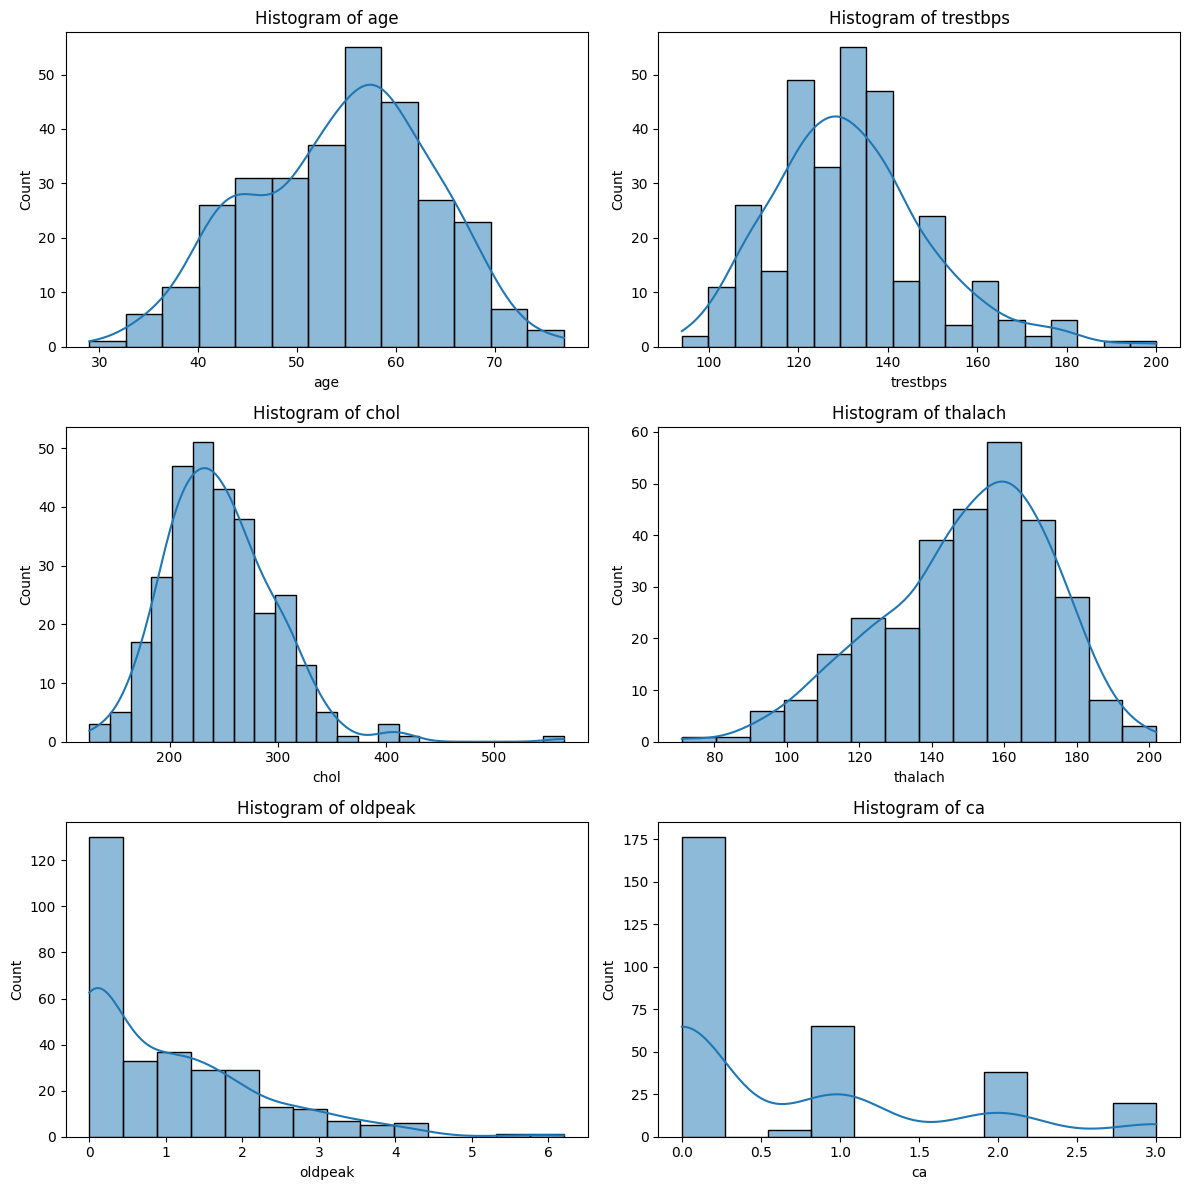

In [23]:
cols = ['age','trestbps','chol','thalach','oldpeak','ca']
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(12,12))
ax= ax.flatten()
for i,col in enumerate(cols):
  sns.histplot(x=X[col],ax=ax[i],kde = True)
  ax[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

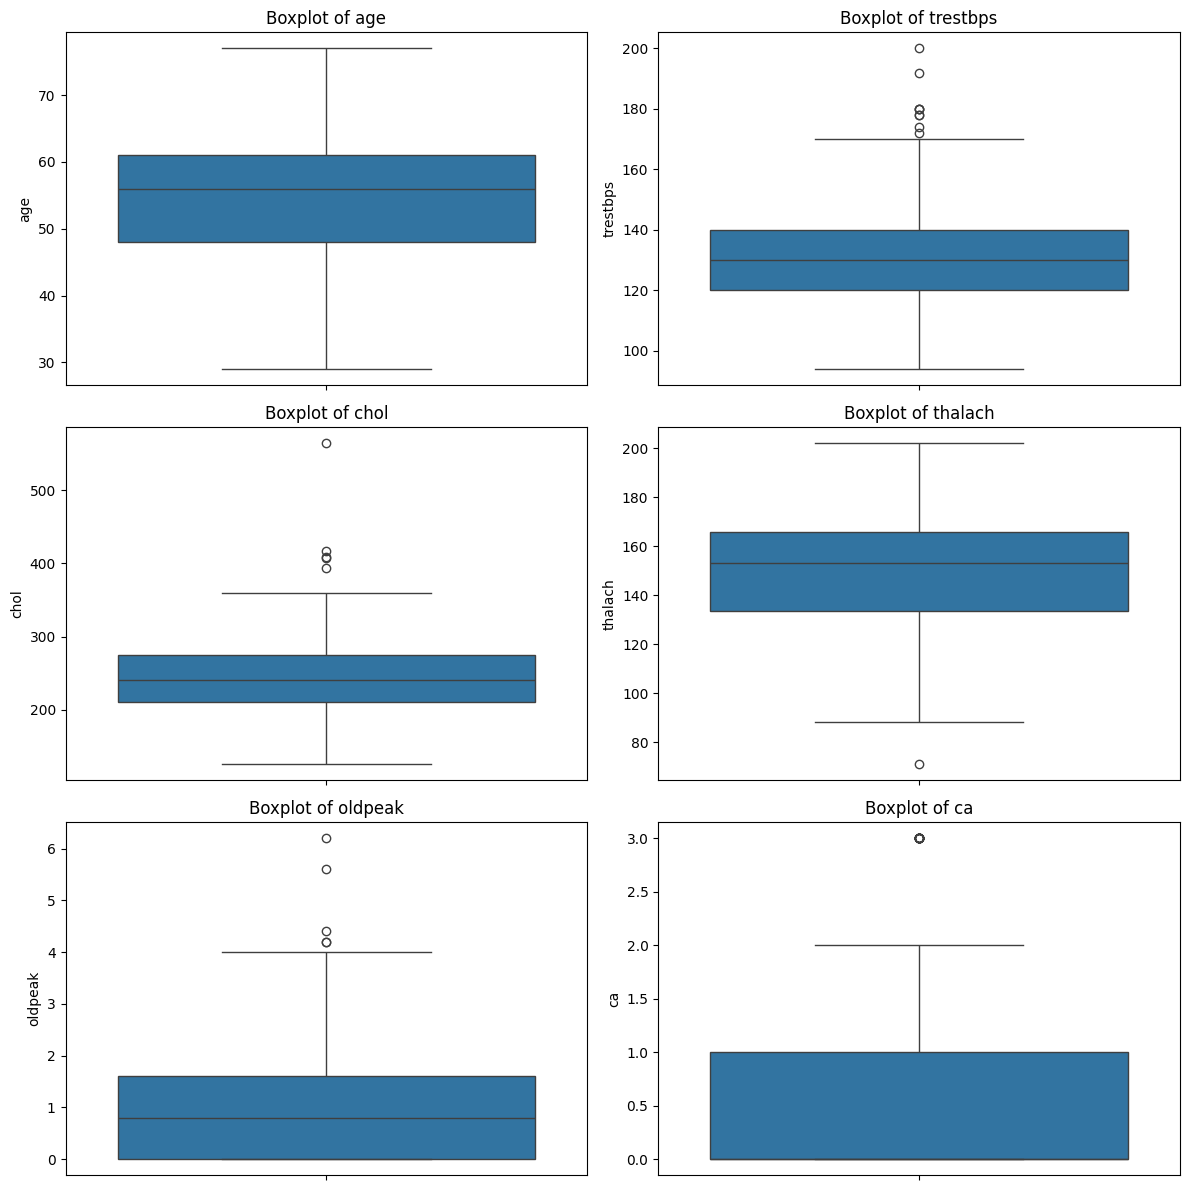

In [24]:
cols = ['age','trestbps','chol','thalach','oldpeak','ca']
fig,ax = plt.subplots(nrows=3,ncols = 2, figsize=(12,12))
ax=ax.flatten()
for i,col in enumerate(cols):
  sns.boxplot(y=X[col],ax=ax[i])
  ax[i].set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

## **Remove Outlier**

In [25]:
trestbps_q1 = X['trestbps'].quantile(0.25)
trestbps_q3=X['trestbps'].quantile(0.75)
trestbps_iqr = trestbps_q3-trestbps_q1
trestbps_lower_bound = trestbps_q1-(1.5*trestbps_iqr)
trestbps_upper_bound=trestbps_q3+(1.5*trestbps_iqr)
X=X[(X['trestbps']>=trestbps_lower_bound) & (X['trestbps']<=trestbps_upper_bound)]


chol_q1 = X['chol'].quantile(0.25)
chol_q3=X['chol'].quantile(0.75)
chol_iqr = chol_q3-chol_q1
chol_lower_bound = chol_q1-(1.5*chol_iqr)
chol_upper_bound=chol_q3+(1.5*chol_iqr)
X=X[(X['chol']>=chol_lower_bound) & (X['chol']<=chol_upper_bound)]


thalach_q1 = X['thalach'].quantile(0.25)
thalach_q3=X['thalach'].quantile(0.75)
thalach_iqr = thalach_q3-thalach_q1
thalach_lower_bound = thalach_q1-(1.5*thalach_iqr)
thalach_upper_bound=thalach_q3+(1.5*thalach_iqr)
X=X[(X['thalach']>=thalach_lower_bound) & (X['thalach']<=thalach_upper_bound)]


oldpeak_q1 = X['oldpeak'].quantile(0.25)
oldpeak_q3=X['oldpeak'].quantile(0.75)
oldpeak_iqr = oldpeak_q3-oldpeak_q1
oldpeak_lower_bound = oldpeak_q1-(1.5*oldpeak_iqr)
oldpeak_upper_bound=oldpeak_q3+(1.5*oldpeak_iqr)
X=X[(X['oldpeak']>=oldpeak_lower_bound) & (X['oldpeak']<=oldpeak_upper_bound)]


cp_q1 = X['cp'].quantile(0.25)
cp_q3=X['cp'].quantile(0.75)
cp_iqr = cp_q3-cp_q1
cp_lower_bound = cp_q1-(1.5*cp_iqr)
cp_upper_bound=cp_q3+(1.5*cp_iqr)
X=X[(X['cp']>=cp_lower_bound) & (X['cp']<=cp_upper_bound)]

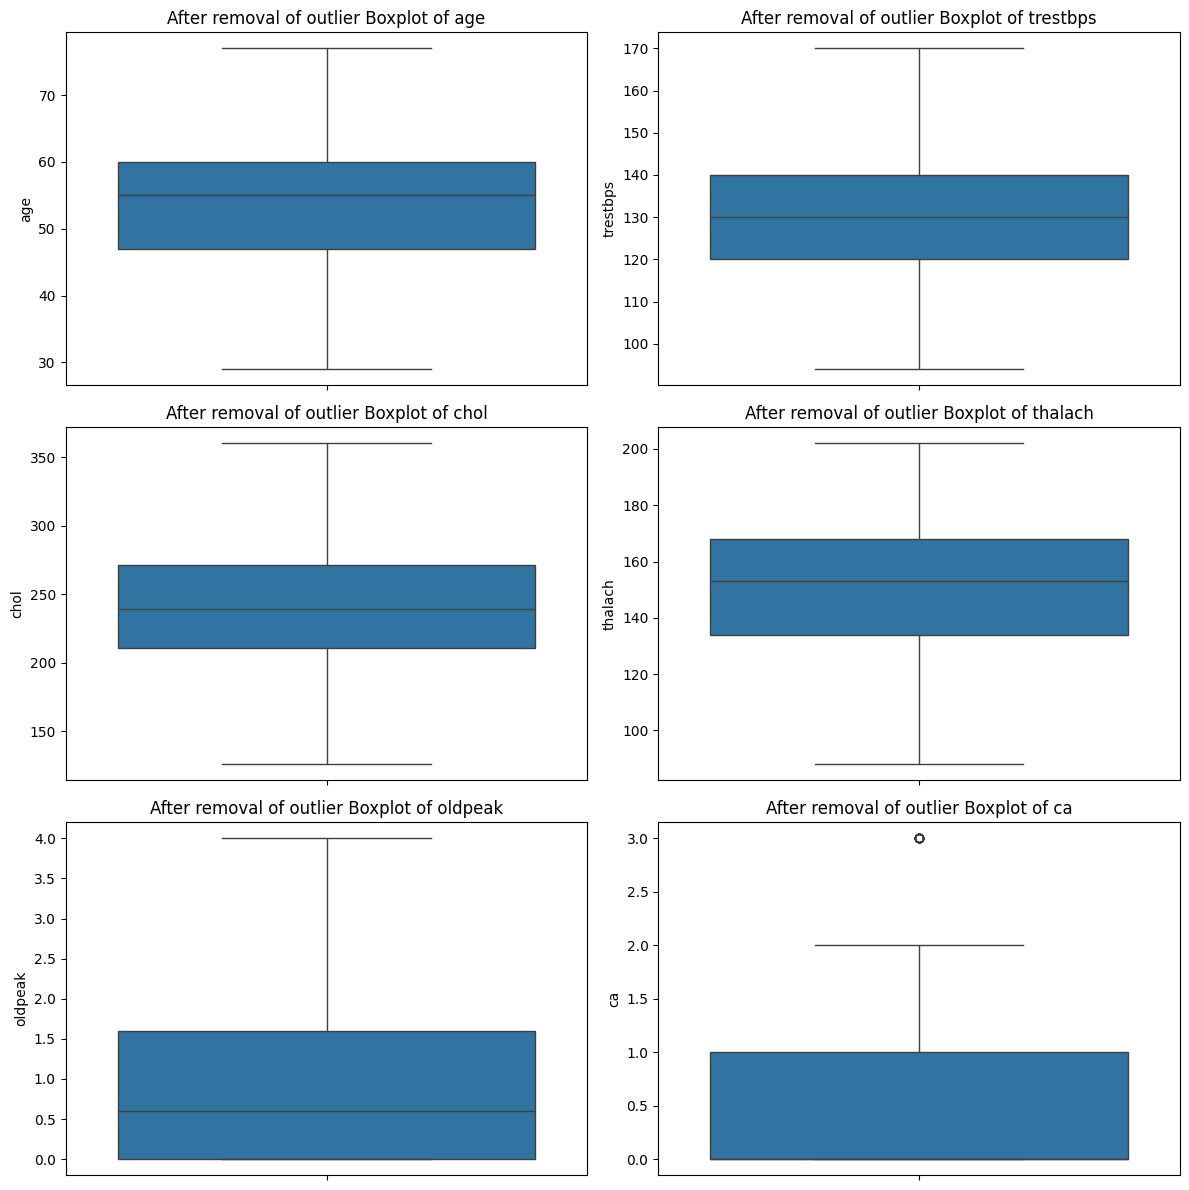

In [26]:
cols = ['age','trestbps','chol','thalach','oldpeak','ca']
fig,ax = plt.subplots(nrows=3,ncols = 2, figsize=(12,12))
ax=ax.flatten()
for i,col in enumerate(cols):
  sns.boxplot(y=X[col],ax=ax[i])
  ax[i].set_title(f"After removal of outlier Boxplot of {col}")
plt.tight_layout()
plt.show()

In [27]:
import numpy as np

X['oldpeak'] = np.log(X['oldpeak'] + 1)
X['chol'] = np.log(X['chol'] + 1)


In [28]:
X.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


## **feature Selection**

In [29]:
# Keep the indices where outliers were not removed
indices_to_keep = X.index

# Filter `y` based on the indices of the filtered `X`
y_filtered = y.loc[indices_to_keep]

In [30]:

# Now `X` and `y_filtered` should have the same number of samples
X_train, X_test, y_train, y_test = train_test_split(X, y_filtered, test_size=0.2, random_state=42)

# Check the shapes to confirm
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(227, 13) (57, 13) (227, 1) (57, 1)


## **Standardization**

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Model**

In [34]:


models = [
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=11),
    DecisionTreeClassifier(),
    RandomForestClassifier(random_state=42,
        n_estimators=200,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=4,
        bootstrap=True,
        max_features='sqrt'),
    GradientBoostingClassifier(random_state=20),
    GaussianNB(),
    SVC(),
]

for model in models:

    model.fit(X_train, y_train)


    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)

    # Print results
    print(f"{model.__class__.__name__}:")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print("_" * 50)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

LogisticRegression:
Train Accuracy: 0.6564
Test Accuracy: 0.6140
__________________________________________________
AdaBoostClassifier:
Train Accuracy: 0.5903
Test Accuracy: 0.5088
__________________________________________________
DecisionTreeClassifier:
Train Accuracy: 1.0000
Test Accuracy: 0.6140
__________________________________________________


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier:
Train Accuracy: 0.7665
Test Accuracy: 0.6316
__________________________________________________


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier:
Train Accuracy: 1.0000
Test Accuracy: 0.5965
__________________________________________________
GaussianNB:
Train Accuracy: 0.6520
Test Accuracy: 0.5614
__________________________________________________
SVC:
Train Accuracy: 0.5463
Test Accuracy: 0.5965
__________________________________________________


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
